<a href="https://colab.research.google.com/github/salimaliraja/salimaliraja/blob/main/SalimAlirajaAnalyzing_Medical_Insurance_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries

# To Handle Data
import numpy as np
import pandas as pd

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To Preprocess Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer

# Import Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Model Selection Tasks
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

# For Classification Tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
# Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
Insurance = ('insurance.csv')
# Display first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Get the Shape of dataframe
df.shape

(1338, 7)

In [6]:
#To add an ID column to an existing Pandas DataFrame, a new column can be created and populated with unique identifiers.
import pandas as pd
import numpy as np

# Create a new column with unique identifiers
df['id'] = np.arange(1, len(df) + 1)
print(df)


      age     sex     bmi  children smoker     region      charges    id
0      19  female  27.900         0    yes  southwest  16884.92400     1
1      18    male  33.770         1     no  southeast   1725.55230     2
2      28    male  33.000         3     no  southeast   4449.46200     3
3      33    male  22.705         0     no  northwest  21984.47061     4
4      32    male  28.880         0     no  northwest   3866.85520     5
...   ...     ...     ...       ...    ...        ...          ...   ...
1333   50    male  30.970         3     no  northwest  10600.54830  1334
1334   18  female  31.920         0     no  northeast   2205.98080  1335
1335   18  female  36.850         0     no  southeast   1629.83350  1336
1336   21  female  25.800         0     no  southwest   2007.94500  1337
1337   61  female  29.070         0    yes  northwest  29141.36030  1338

[1338 rows x 8 columns]


In [7]:
# Get the min and max values of the id column
df['id'].min() , df['id'].max()

(1, 1338)

In [8]:
#Exploratory Data Analysis (EDA):

#Perform a comprehensive analysis of the dataset to understand the distribution of variables
#and identify any correlations between features such as age, BMI, smoking status, and medical costs (charges).
#Use descriptive statistics and visualizations to summarize the data and highlight any interesting trends or outliers.





In [9]:
# Get the min and max values of the age column
df['age'].min() , df['age'].max()

(18, 64)

In [10]:
# Get the min and max values of the BMI column
df['bmi'].min() , df['bmi'].max()

(15.96, 53.13)

In [11]:
#Get the min and max number of children of the Children column
df['children'].min() , df['children'].max()

(0, 5)

In [12]:
#Get the min and max values of the Charges column
df['charges'].min() , df['charges'].max()

(1121.8739, 63770.42801)

<Axes: xlabel='age', ylabel='Count'>

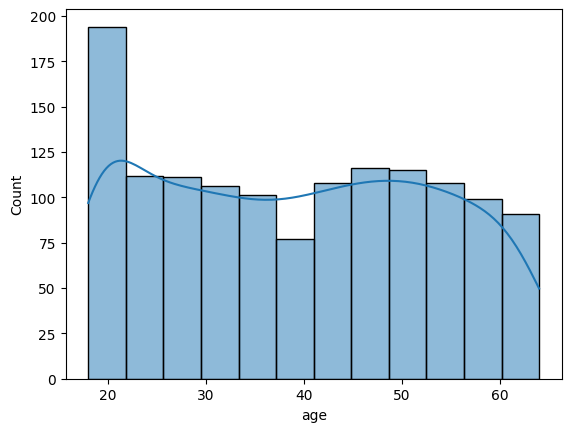

In [13]:
# Draw a histogram of the age column to see the distribution
sns.histplot(df, x='age', kde=True)

Mean: 39.20702541106129
Median: 39.0
Mode: 18


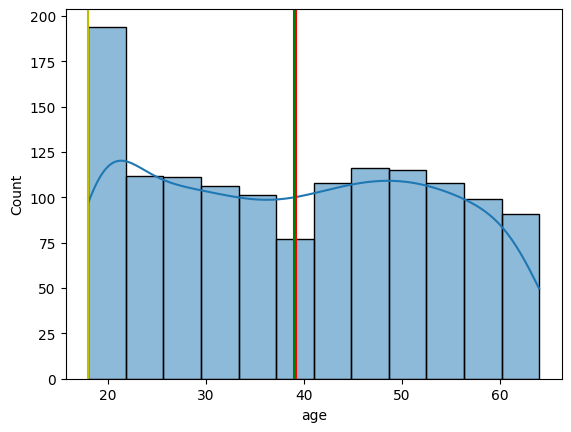

In [15]:
# Plot the mean , median and mode of the age column using seaborn
sns.histplot(df, x='age', kde=True)
plt.axvline(df['age'].mean(), color='r')
plt.axvline(df['age'].median(), color='g')
plt.axvline(df['age'].mode()[0], color='y')

# Print the mean, median and mode
print(f"Mean: {df['age'].mean()}")
print(f"Median: {df['age'].median()}")
print(f"Mode: {df['age'].mode()[0]}")

In [16]:
# Plot the histogram of sex column using plotly  coloring this by smoker column
px.histogram(df, x='sex', color='smoker')

In [17]:
# find the value count of age column by grouping sex column
age_count = df.groupby('sex')['age'].count()
print(age_count)

# visualize using plotly
fig = px.bar(age_count,color=age_count.index, title='Distribution of Male and Female in the data')
fig.show()

sex
female    662
male      676
Name: age, dtype: int64


In [18]:
# Calculate % of value counts of male and female in data
male_count = 676
female_count = 662
total_count = male_count + female_count

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male Percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = (male_count - female_count) / female_count * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data")

# visualize using plotly
fig = px.bar(age_count,color=age_count.index, title='Distribution of Male and Female in the data')
fig.show()

Male Percentage in the data: 50.52%
Female Percentage in the data: 49.48%
Males are 2.11% more than females in the data


In [19]:
# Exploring the Region column
# find the unique values in Region column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
# find the unique value count of dataset column in the data

region_count = df['region'].value_counts()
print(region_count)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [21]:
# visualize using plotly
plt.show()

# find the value count of dataset column grouped by sex column
df_grouped = df.groupby('sex')['region'].value_counts()
print(df_grouped)

sex     region   
female  southeast    175
        northwest    164
        southwest    162
        northeast    161
male    southeast    189
        northeast    163
        southwest    163
        northwest    161
Name: count, dtype: int64


In [22]:
# make a plot of age column using plotly and color it by dataset column
fig = px.histogram(df, x='age', color='region',title='Distribution of age country-wise in the data')
fig.show()

In [23]:
# make a dataframe of the mean, median and mode of the age column grouped by dataset column in the data
mean_age = df.groupby('region')['age'].mean()
median_age = df.groupby('region')['age'].median()
mode_age = df.groupby('region')['age'].agg(pd.Series.mode)

result = pd.DataFrame({
    'Mean Age': mean_age.round(1),
    'Median Age': median_age.round(0),
    'Mode Age': mode_age
}).reset_index()

result.columns = ['region', 'Mean Age', 'Median Age', 'Mode Age']
result

,region,Mean Age,Median Age,Mode Age
0,northeast,39.3,40.0,18
1,northwest,39.2,39.0,19
2,southeast,38.9,39.0,18
3,southwest,39.5,39.0,19


In [24]:
# value count of region column grouped by sex column in the data
df.groupby('smoker')['region'].value_counts()

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
Name: count, dtype: int64

In [26]:
# count plot of region column by smoker column using plotly
fig = px.histogram(df, x='region', color='smoker',title='Distribution of smoker by region in the data')
fig.show()

In [27]:
# check the value count of the bmi column in the data
print(df['bmi'].value_counts())


# make histplot of the bmi column using plotly
fig = px.histogram(df, x='bmi',title="Distribution of BMI (bmi)")
fig.show()

bmi
32.300    13
28.310     9
30.800     8
31.350     8
30.495     8
          ..
39.425     1
40.480     1
38.900     1
47.410     1
19.300     1
Name: count, Length: 548, dtype: int64


Mean: 30.66339686098655
Median: 30.4
Mode: 32.3


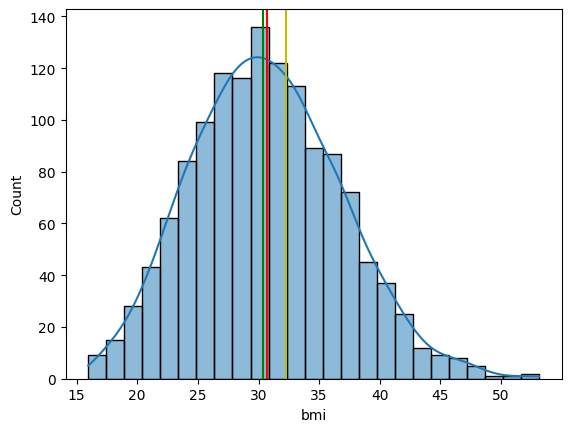

In [29]:
# Plot the mean , median and mode of the bmi column using seaborn
sns.histplot(df, x='bmi', kde=True)
plt.axvline(df['bmi'].mean(), color='r')
plt.axvline(df['bmi'].median(), color='g')
plt.axvline(df['bmi'].mode()[0], color='y')

# Print the mean, median and mode
print(f"Mean: {df['bmi'].mean()}")
print(f"Median: {df['bmi'].median()}")
print(f"Mode: {df['bmi'].mode()[0]}")

In [30]:
# Define bin edges (upper limits of categories)
bins = [0, 15, 20, 25, 30, 35, 40, float('inf')]

# Define bin labels
labels = [
    'Underweight',                        # <18.5
    'Healthy Weight',                     # 18.5-24.9
    'Overweight',                         # 25.0-29.9
    'Obese',                              # >30.0
    'Obesity (Class 1)',                  # 30.5-34.9
    'Obesity (Class 2)',                  # 35.0-39.9
    'Obesity (Class 3)[SEVERE OBESITY]'   # >40.0
]

# Bin the data
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True, include_lowest=True)

# Optional: Check distribution
print(df['bmi_category'].value_counts())

# visualize the distribution using plotly
fig = px.bar(df, y='bmi_category',title="Feature Engineering : Body Mass Index (bmi) Categories ")
fig.update_yaxes(autorange='reversed')
fig.show()

bmi_category
Obesity (Class 1)                    389
Obese                                386
Obesity (Class 2)                    225
Overweight                           206
Obesity (Class 3)[SEVERE OBESITY]     91
Healthy Weight                        41
Underweight                            0
Name: count, dtype: int64


In [89]:
# Define bin edges (upper limits of categories)
import pandas as pd
bins = [ 5, 13, 20, 36, 65, float('inf')]

# Define bin labels

labels = [
    'Children',                           # 5-12 years
    'Teenagers',                          # 13-19 years
    'Young Adults',                       # 20-35 years
    'Middle-aged Adults',                 # 36-60 years
    'Seniors/Elderly',                    # 65 and older'
]


# Bin the data
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Optional: Check distribution
print(df['age_category'].value_counts())

# visualize the distribution using plotly
fig = px.bar(df, y='age_category',title="Feature Engineering : Age Categories ")
fig.update_yaxes(autorange='reversed')
fig.show()

age_category
Middle-aged Adults    739
Young Adults          433
Teenagers             166
Children                0
Seniors/Elderly         0
Name: count, dtype: int64


In [31]:
# Basic statistics for BMI column
print("\nBasic Statistics for bmi:")
print(df['bmi'].describe())


Basic Statistics for bmi:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [32]:
# Additional statistics
print("\nAdditional Statistics:")
print(f"Median bmi: {df['bmi'].median()}")
print(f"Mode bmi: {df['bmi'].mode()[0]}")


Additional Statistics:
Median bmi: 30.4
Mode bmi: 32.3


In [ ]:
# Check for missing values
print("\nMissing Values Check:")
print(f"Number of missing values in bmi column: {df['bmi'].isna().sum()}")


Missing Values Check:
Number of missing values in bmi column: 0


In [33]:
# Check for missing values
print("\nMissing Values Check:")
print(f"Number of missing values in charges column: {df['charges'].isna().sum()}")


Missing Values Check:
Number of missing values in charges column: 0


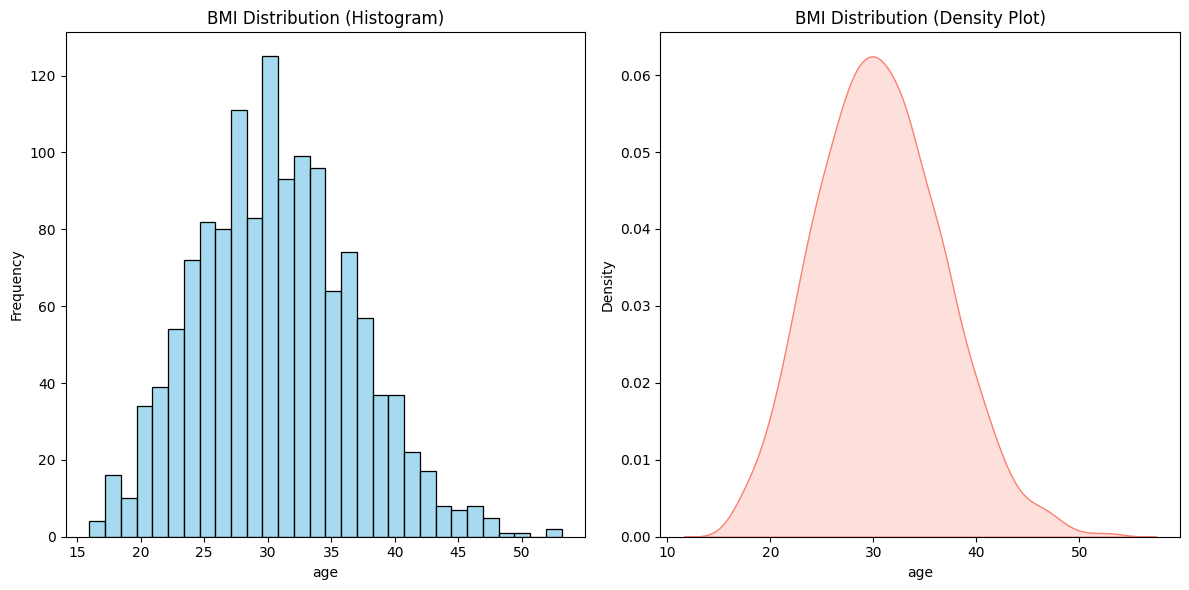

In [34]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], bins=30, kde=False, color='skyblue')
plt.title('BMI Distribution (Histogram)')
plt.xlabel('age')
plt.ylabel('Frequency')

# Density plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['bmi'], fill=True, color='salmon')
plt.title('BMI Distribution (Density Plot)')
plt.xlabel('age')

plt.tight_layout()
plt.show()

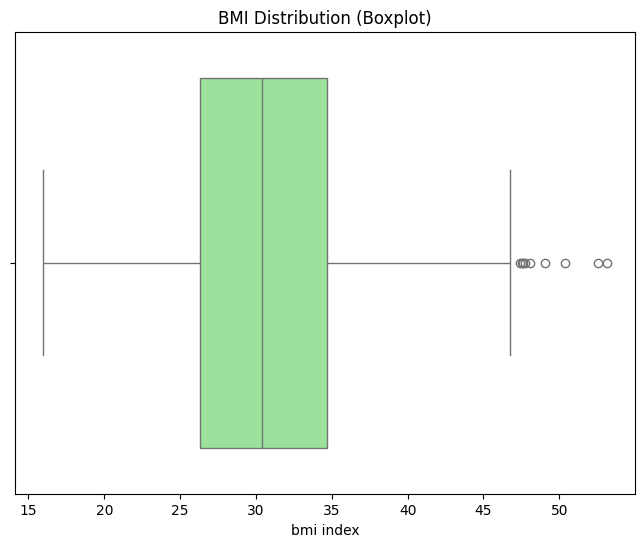

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'], color='lightgreen')
plt.title('BMI Distribution (Boxplot)')
plt.xlabel('bmi index')
plt.show()

In [36]:
# Value counts and proportions
age_counts = df['age'].value_counts()
age_perc = df['age'].value_counts(normalize=True) * 100
print(f"Age Value Counts:\n{age_counts}")
print(f"Age Proportions: {age_perc.round(2)}")

Age Value Counts:
age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64
Age Proportions: age
18    5.16
19    5.08
46    2.17
52    2.17
50    2.17
47    2.17
48    2.17
51    2.17
45    2.17
20    2.17
24    2.09
27    2.09
28    2.09
25    2.09
23    2.09
49    2.09
54    2.09
53    2.09
22    2.09
21    2.09
26    2.09
31    2.02
41    2.02
44    2.02
43    2.02
42    2.02
29    2.02
30    2.02
40    2.02
32    1.94
33    1.94
57    1.94
34    1.94
55    1.94
56    1.94
35    1.87
58    1.87
37    1.87
59    1.87
39    1.87
36    1.87
38    1.87
62    1.72
60    1.72
63    1.72
61    1.72
64

In [37]:
#Value counts and proportions
charges_counts = df['charges'].value_counts()
charges_perc = df['charges'].value_counts(normalize=True) * 100
print(f"Charges Value Counts:\n{charges_counts}")
print(f"Charges Proportions: {charges_perc.round(2)}")

Charges Value Counts:
charges
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64
Charges Proportions: charges
1639.56310     0.15
2221.56445     0.07
19798.05455    0.07
13063.88300    0.07
13555.00490    0.07
               ... 
1149.39590     0.07
37079.37200    0.07
4738.26820     0.07
2897.32350     0.07
4762.32900     0.07
Name: proportion, Length: 1337, dtype: float64


In [38]:
#Value counts and proportions
bmi_counts = df['bmi'].value_counts()
bmi_perc = df['bmi'].value_counts(normalize=True) * 100
print(f"BMI Value Counts:\n{bmi_counts}")
print(f"BMI Proportions: {bmi_perc.round(2)}")

BMI Value Counts:
bmi
32.300    13
28.310     9
30.800     8
31.350     8
30.495     8
          ..
39.425     1
40.480     1
38.900     1
47.410     1
19.300     1
Name: count, Length: 548, dtype: int64
BMI Proportions: bmi
32.300    0.97
28.310    0.67
30.800    0.60
31.350    0.60
30.495    0.60
          ... 
39.425    0.07
40.480    0.07
38.900    0.07
47.410    0.07
19.300    0.07
Name: proportion, Length: 548, dtype: float64


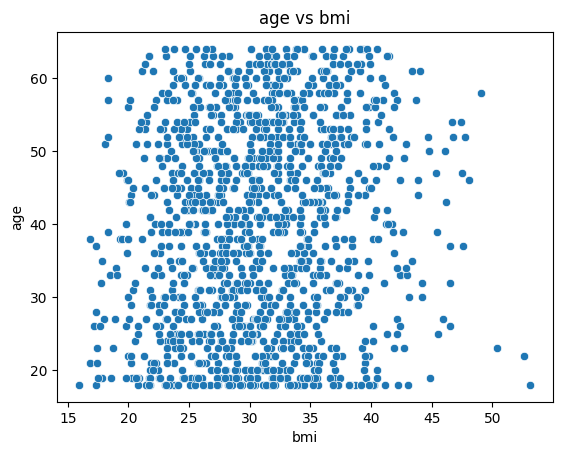

In [40]:
sns.scatterplot(x='bmi', y='age', data=df)
plt.title('age vs bmi')
plt.xlabel('bmi')
plt.ylabel('age')
plt.show()

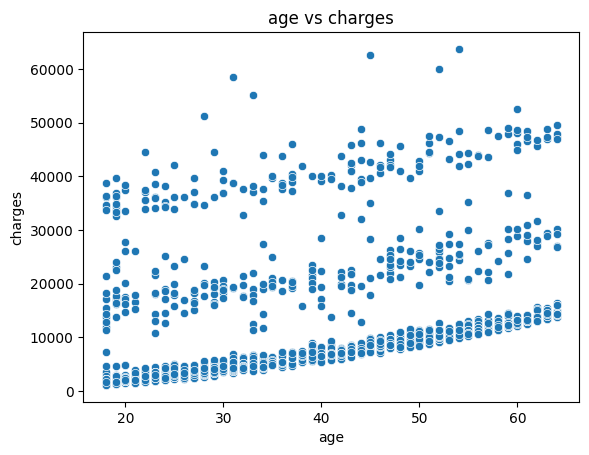

In [42]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('age vs charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

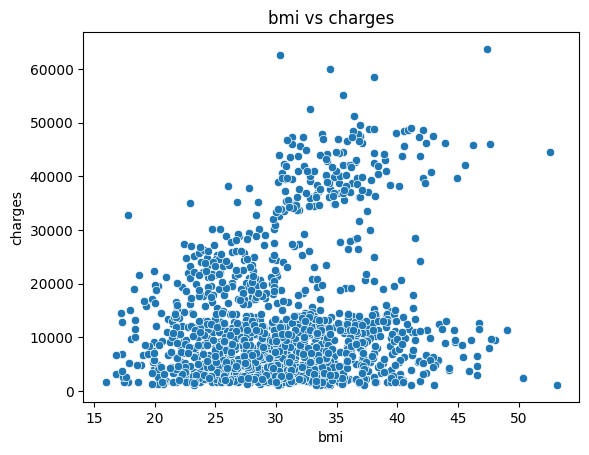

In [44]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('bmi vs charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

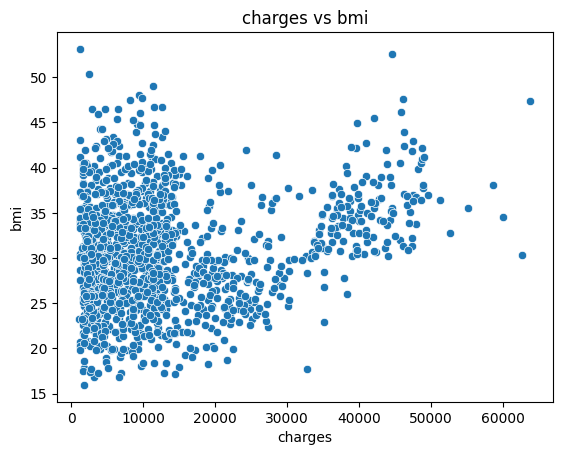

In [45]:
sns.scatterplot(x='charges', y='bmi', data=df)
plt.title('charges vs bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

In [47]:
#Data PREprocessing
#missing values
# find the missing values percentage of trestbps column in the data
print(f"Percentage of missing values in the age column: {df['age'].isnull().sum() / len(df) * 100:.2f}%")

Percentage of missing values in the age column: 0.00%


In [48]:
# check missing values in the all columns of the data
missing = (df.isnull().sum()[df.isnull().sum()>0]/len(df)*100).sort_values(ascending=False)
print(missing)


# create the bar plot using plotly
fig = px.bar(missing,title="Percentage of Missing values in the data")
fig.show()

Series([], dtype: float64)


In [49]:
#Machine Learning Based Imputation
# Create a list of columns with missing values greater than 0
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

[]

In [51]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()] # find rows with missing values
    df_not_null = df[df[passed_col].notnull()] # find rows without missing values

    # drop the column with missing values
    X = df_not_null.drop(passed_col, axis=1)

    # store the column with missing values in y
    y = df_not_null[passed_col]

    # find other columns with missing values in the dataframe
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # create a LabelEncoder object to encode the categorical columns
    label_encoder = LabelEncoder()

    # encode the categorical columns by looping through the columns in X
    for col in X.columns:
        # if the dtype of the column is object or category
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            # encode the column using the label encoder
            X[col] = label_encoder.fit_transform(X[col])

    # If the column passed is in the bool_cols list
    if passed_col in bool_cols:
        # encode the column using the label encoder
        y = label_encoder.fit_transform(y)
    # Create iterative imputer with Random Forest Regressor as the estimator
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # loop through the columns in other_missing_cols
    for col in other_missing_cols:
        # if the column has missing values
        if X[col].isnull().sum() > 0:
            # reshape the column to a 2D array
            col_with_missing_values = X[col].values.reshape(-1, 1)
            # impute the missing values using the iterative imputer
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            # replace the missing values in the column with the imputed values
            X[col] = imputed_values[:, 0]
        else:
            # do nothing
            pass
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a random forest classifier
    rf_classifier = RandomForestClassifier()

    # fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)

    # calculate the accuracy score
    acc_score = accuracy_score(y_test, y_pred)

    # print the accuracy score
    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [55]:
# check for greater than zero missing values in the data
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0


In [54]:
# impute missing values using  functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

In [59]:
# Define numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['age', 'bmi', 'children', 'charges', 'id']


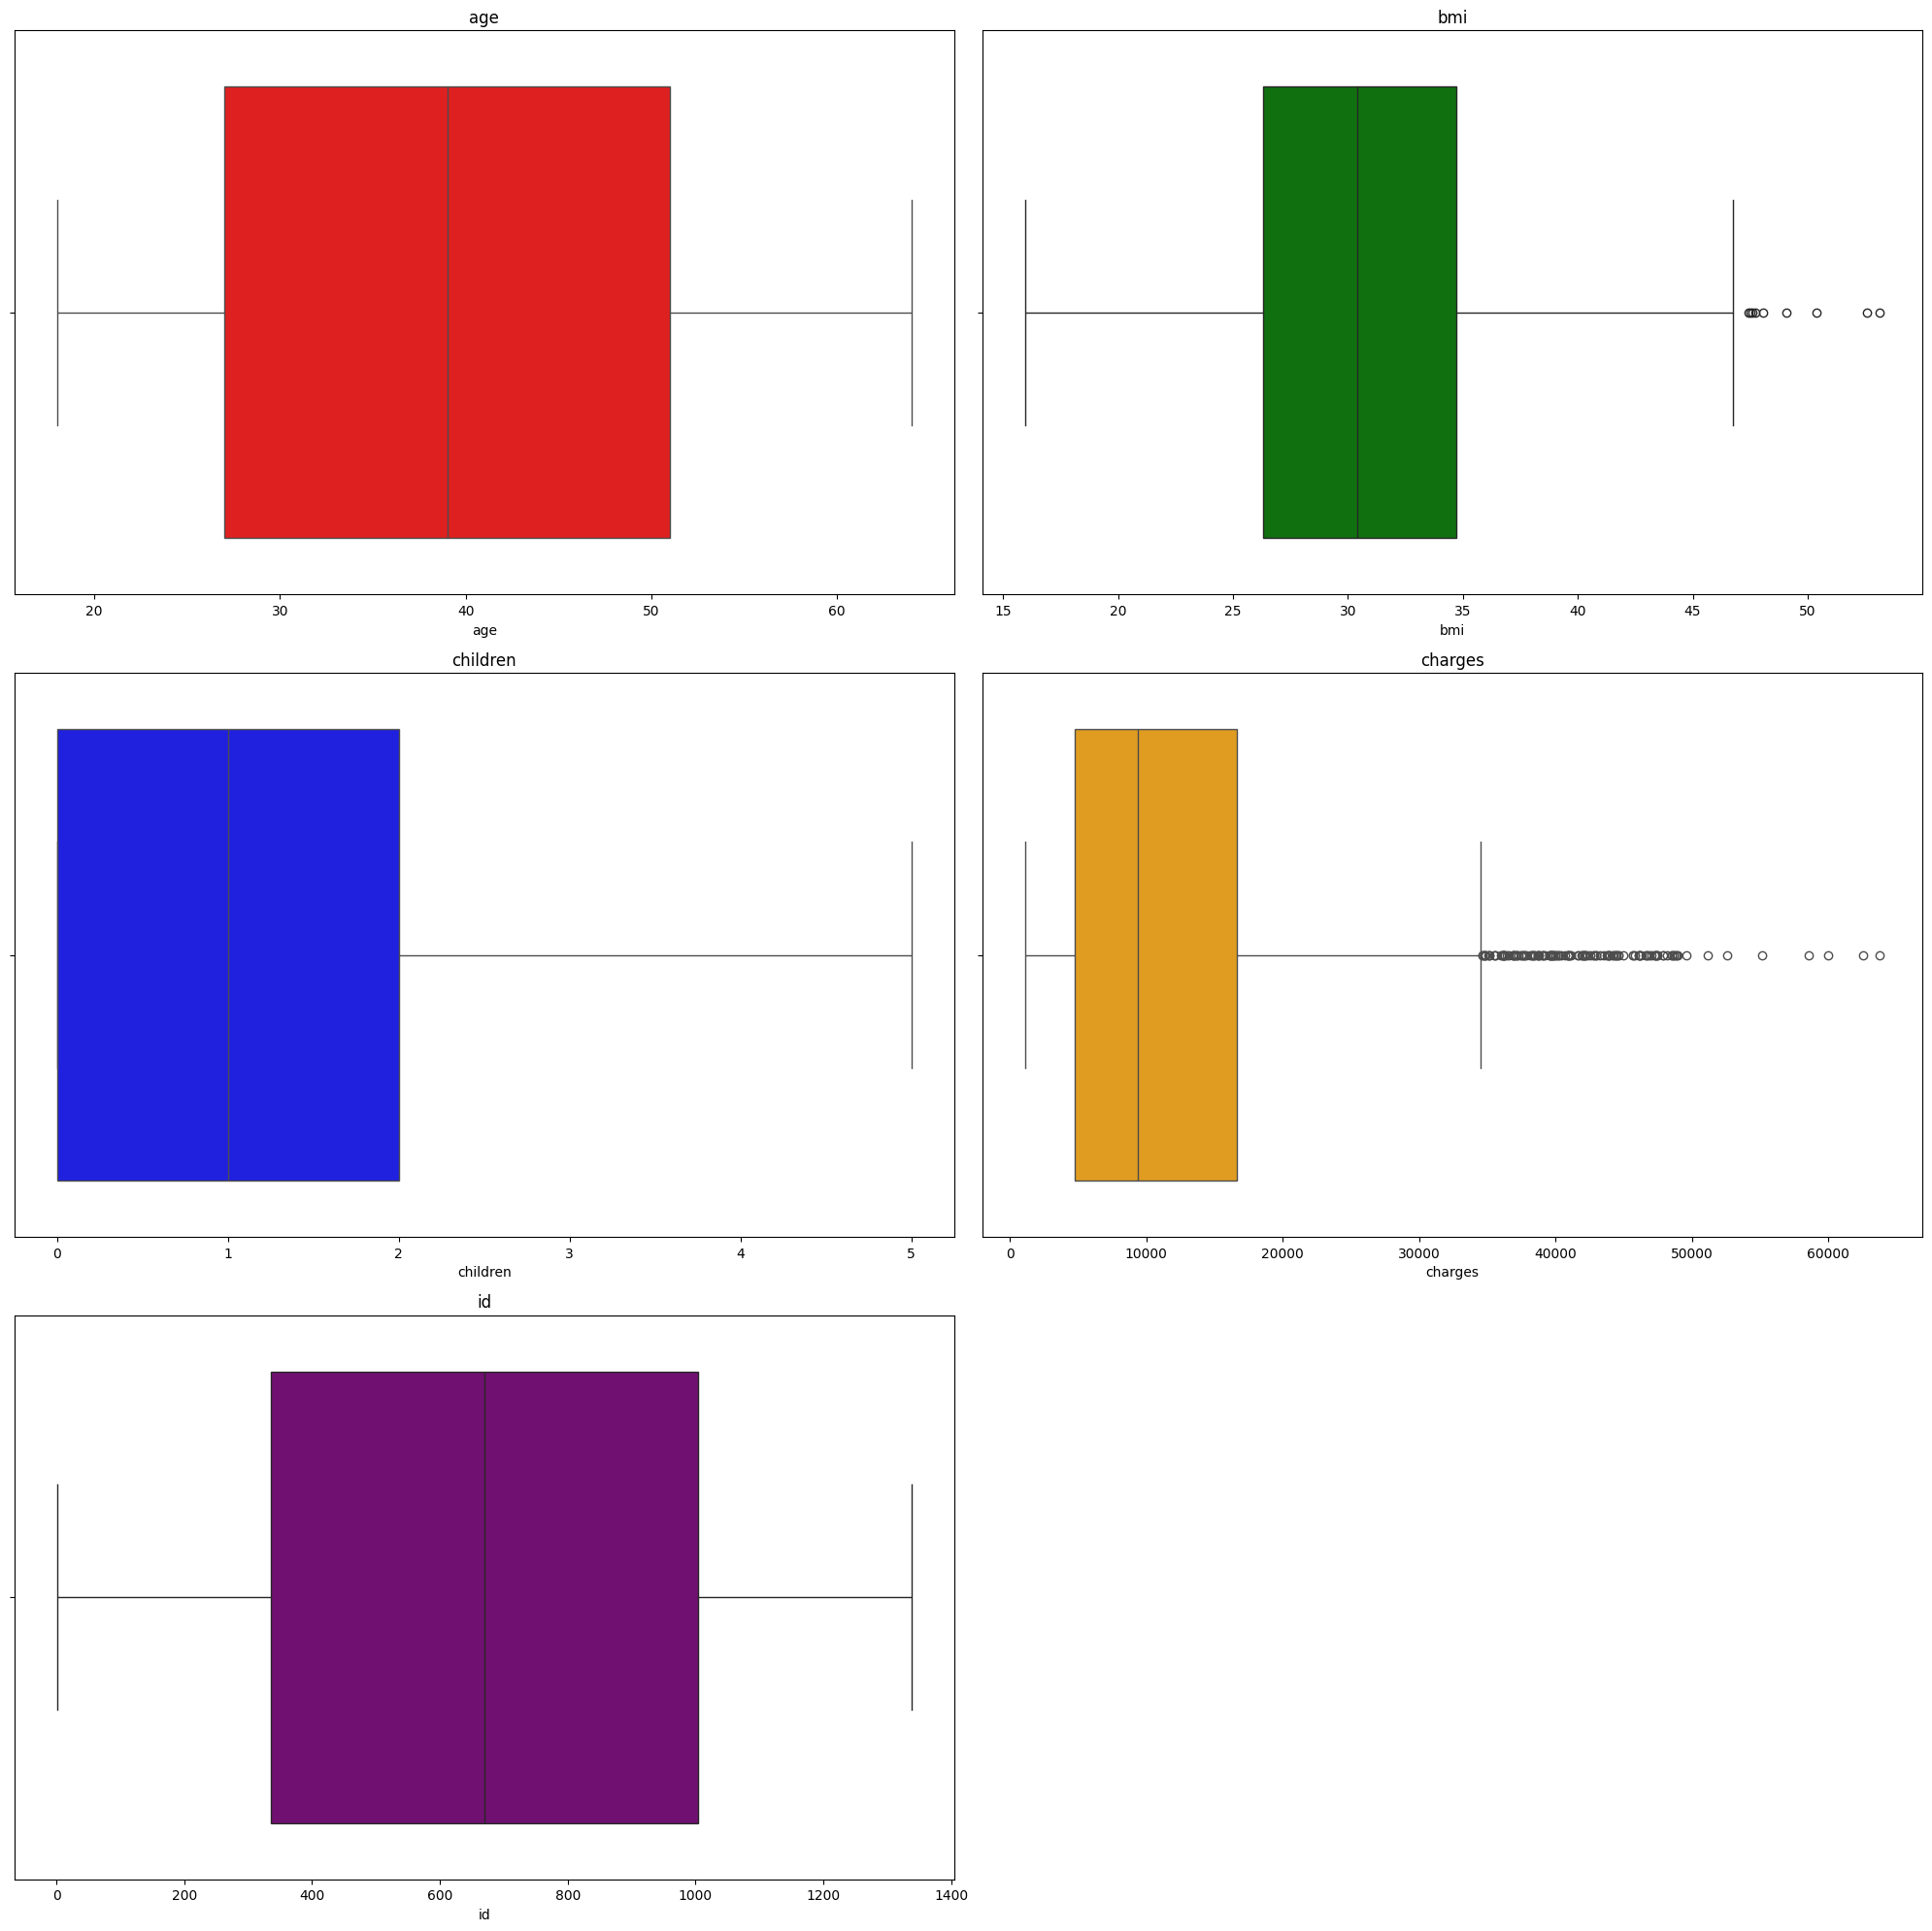

In [60]:
#Dealing with Outliers
# create boxplot for all numeric columns using for loop and subplots
plt.figure(figsize=(20,20))

colors= ['red','green','blue','orange','purple']
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [63]:
# make plot with plotly to get clear insights of the numerical columns
fig = px.box(df,y=numeric_cols,color_discrete_sequence=colors)
fig.update_layout(title='Boxplot of Numerical Columns',height=1000,width=1000)
fig.show()

In [65]:
#Encoding
# Encode the categorical columns of X by label encoder and save it for Inverse transform
# Automatically select object/categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Create dictionary to store encoders per column
encoders = {}

# Encode each column using separate LabelEncoder and save encoder for inverse_transform
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Handle missing as 'nan'
    encoders[col] = le

# Now df is encoded
print(df.head())


# Inverse transform example (recover original values)
# for col in cat_cols:
#     df[col] = encoders[col].inverse_transform(df[col])

# Now df has original values back
# print(df.head())


   age  sex     bmi  children  smoker  region      charges  id  bmi_category
0   19    0  27.900         0       1       3  16884.92400   1             1
1   18    1  33.770         1       0       2   1725.55230   2             2
2   28    1  33.000         3       0       2   4449.46200   3             2
3   33    1  22.705         0       0       1  21984.47061   4             5
4   32    1  28.880         0       0       1   3866.85520   5             1


In [79]:
#Machine Learning
df['smoker'].value_counts()

,count
smoker,
0,1064
1,274


In [78]:
# Create feature and label
X = df.drop('smoker', axis=1)
y = df['smoker']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Create feature and label
X = df.drop('smoker', axis=1)
y = df['smoker']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Import Models of Machine Learning
# import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# import pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# import model selection
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

In [80]:
#Defining the Models
#  Define models and hyperparameter grids

models = {
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {}  # No hyperparams for basic linear model
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__max_depth": [10, 20],
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__max_depth": [3, 6],
            "model__learning_rate": [0.1, 0.3]
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "model__kernel": ['linear', 'rbf'],
            "model__C": [0.1, 1, 10],
            "model__gamma": ['scale', 'auto']
        }
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7],
            "model__weights": ['uniform', 'distance']
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [3, 5]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__learning_rate": [0.5, 1.0]
        }
    },
    "HistGradientBoosting": {
        "model": HistGradientBoostingClassifier(random_state=42),
        "params": {
            "model__learning_rate": [0.05, 0.1],
            "model__max_iter": [100, 200],
            "model__max_depth": [None, 10]
        }
    }
}

In [75]:
#Applying Grid Search CV
# Store results (model name and performance metrics)
results = []
best_accuracy = 0
best_model = None

# Iterate over the models
for name, model_params in models.items():

    # Create pipeline with the current model
    pipeline = Pipeline([

        ('model', model_params['model'])
    ])

    # Hyperparameter tuning
    grid_search = GridSearchCV(pipeline, model_params['params'], cv=5, scoring='accuracy',error_score='raise', n_jobs=-2)

    # Fit on training data
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Store results for current model
    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Cross-Validated Accuracy": grid_search.best_score_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred,average='micro'),
        "Recall": recall_score(y_test, y_pred,average='micro'),
        "F1": f1_score(y_test, y_pred,average='micro')
    })

# Track best model
    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Display best model
print(f"Best Model : {best_model}")
print(f"Best Cross-Validated Accuracy: {best_accuracy:.4f}")

Best Model : Pipeline(steps=[('model',
                 HistGradientBoostingClassifier(learning_rate=0.05,
                                                max_iter=200,
                                                random_state=42))])
Best Cross-Validated Accuracy: 0.9654


In [81]:
#Evaluation of Models
# Final results
results_df = pd.DataFrame(results)
results_df

,Model,Best Params,Cross-Validated Accuracy,Accuracy,Precision,Recall,F1
0,LogisticRegression,{},0.954206,0.970149,0.970149,0.970149,0.970149
1,RandomForest,"{'model__max_depth': 10, 'model__n_estimators'...",0.962617,0.966418,0.966418,0.966418,0.966418
2,XGBoost,"{'model__learning_rate': 0.1, 'model__max_dept...",0.962617,0.966418,0.966418,0.966418,0.966418
3,SVC,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.965421,0.970149,0.970149,0.970149,0.970149
4,KNeighbors,"{'model__n_neighbors': 5, 'model__weights': 'd...",0.922430,0.932836,0.932836,0.932836,0.932836
5,GradientBoosting,"{'model__learning_rate': 0.1, 'model__max_dept...",0.958879,0.973881,0.973881,0.973881,0.973881
6,AdaBoost,"{'model__learning_rate': 0.5, 'model__n_estima...",0.956075,0.955224,0.955224,0.955224,0.955224
7,HistGradientBoosting,"{'model__learning_rate': 0.05, 'model__max_dep...",0.961682,0.977612,0.977612,0.977612,0.977612


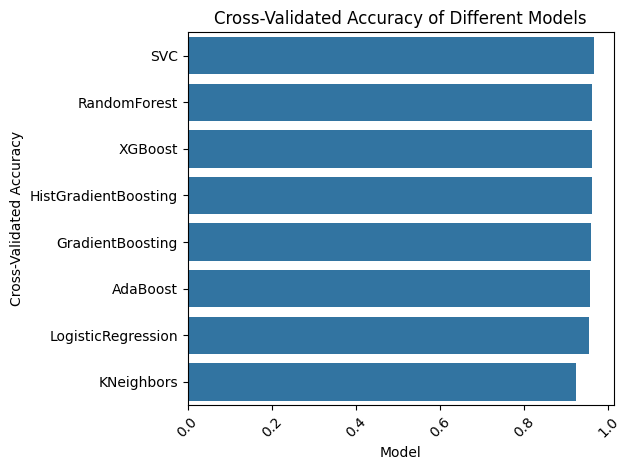

In [82]:
# Sort the DataFrame by the 'Cross-Validated Accuracy' column in descending order
sorted_df = results_df.sort_values(by='Cross-Validated Accuracy', ascending=False)

# Create a bar plot
sns.barplot(x=sorted_df['Cross-Validated Accuracy'], y=sorted_df['Model'],orient='h')
plt.xlabel('Model')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

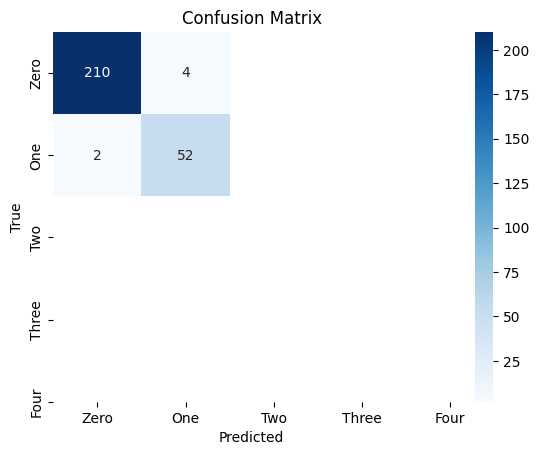

In [83]:
# Define class names for the confusion matrix
class_names = ['Zero', 'One', 'Two', 'Three','Four']

# Define the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [86]:
#Retaining the Best Model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_iter': [10, 50, 100],
    'max_depth': [10, 30, 50]
}

# Initialize the model
model = HistGradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can use other metrics
    n_jobs=-1  # Use all available cores
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Retrain the best model on the full training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"accuracy : {accuracy_score(y_test, y_pred)}")
print(f"precision : {precision_score(y_test, y_pred, average='micro')}")
print(f"recall : {recall_score(y_test, y_pred, average='micro')}")
print(f"f1 score : {f1_score(y_test, y_pred, average='micro')}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 50}
accuracy : 0.9776119402985075
precision : 0.9776119402985075
recall : 0.9776119402985075
f1 score : 0.9776119402985075


In [88]:
#Saving the Best Model
# save the best model
import pickle
pickle.dump(best_model, open('histgradientboosting.pkl', 'wb'))